# **Scraping Rotten Tomatoes**

In this practical use case we are going to scrape rottentomatoes.com. The aim here is to tackle a few common issues that can arise in projects.  
Let's check the website "Rotten Tomatoes" we will be using. Below is a snapshot of the website: 

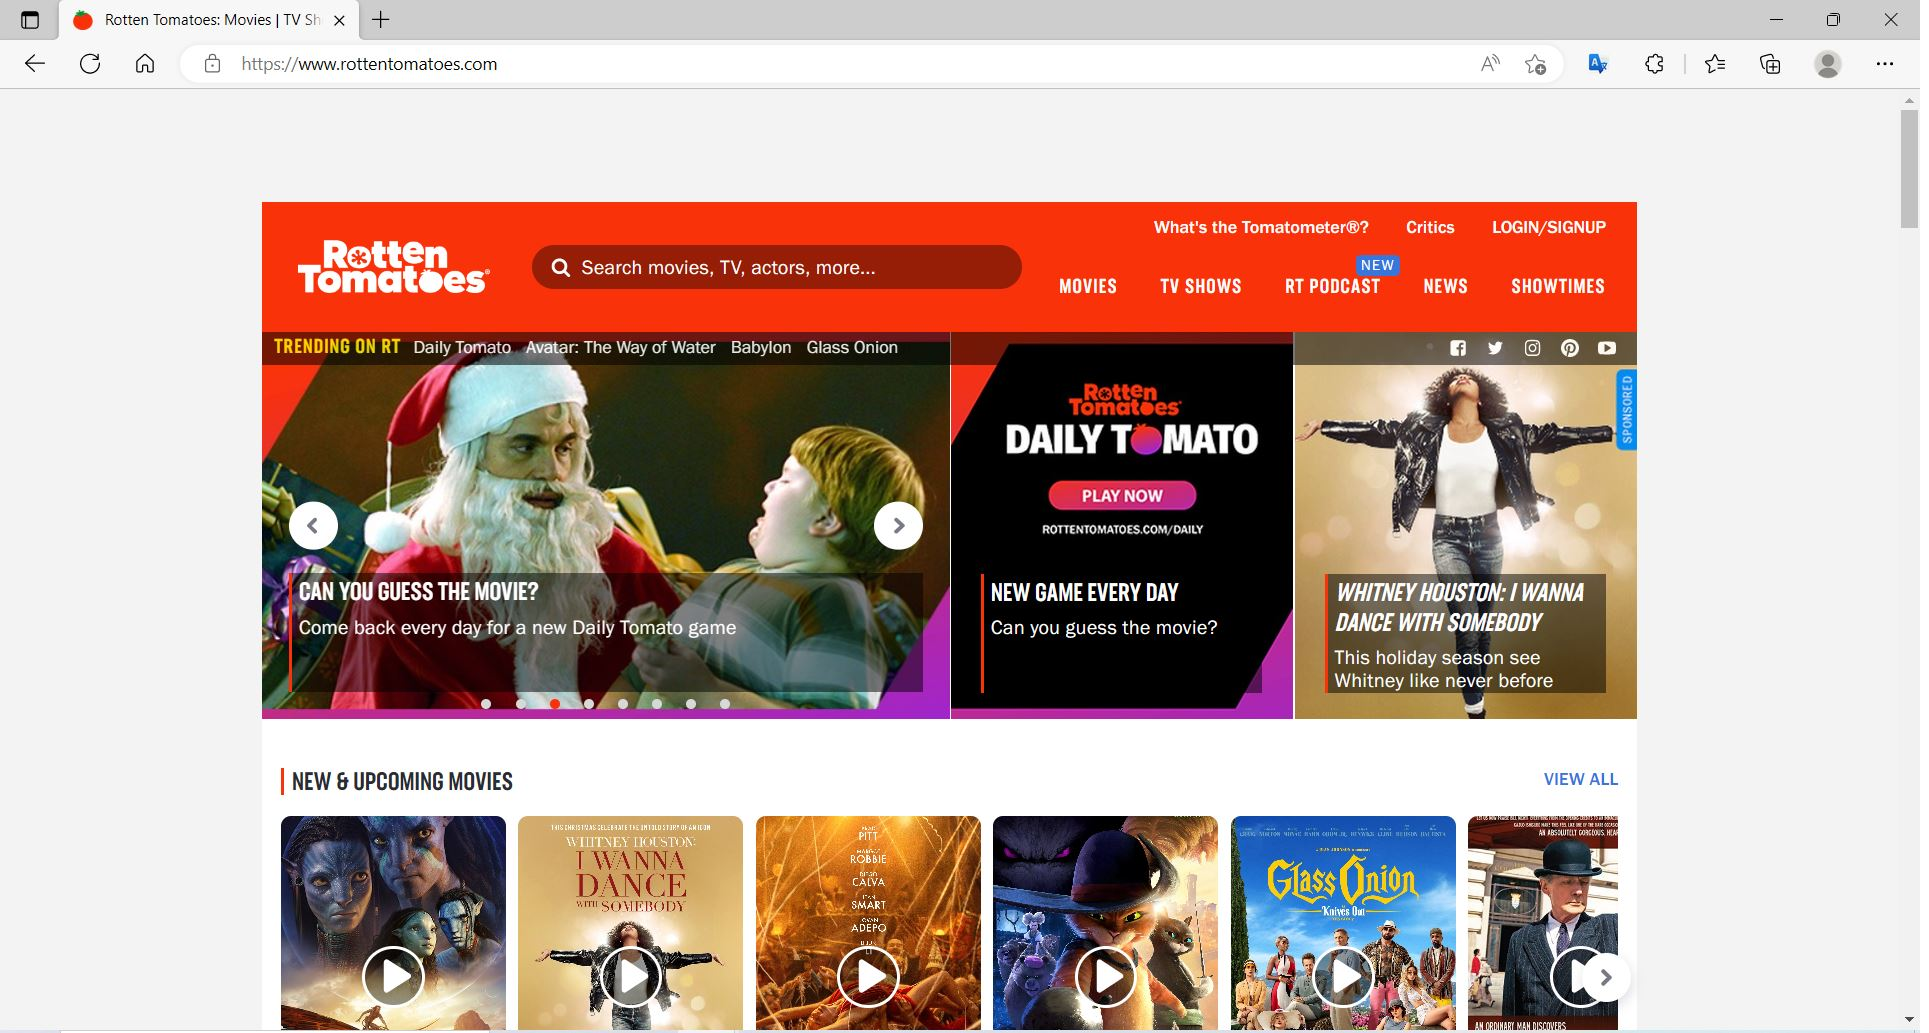

We will focus on the following URL: "https://editorial.rottentomatoes.com/guide/essential-movies-to-watch-now/". It contains a list of movies and some details about them. The final step will be to store and export the data into a dataframe and excel or csv file.

**Note:** This code was written on Google Colab.  
**Language:** Python.  
**Packages:** requests, BeautifulSoup, pandas.

**Import libraries**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

**Setting up the scraper**

In [ ]:
# store the page url in a variable named base_site
base_site = "https://editorial.rottentomatoes.com/guide/essential-movies-to-watch-now/"

# sending a request to the page
response = requests.get(base_site)
response

<Response [200]>

In [ ]:
# the request is successful as indicated by the status code
# let's get the html from the response
html = response.content

# choosing a parser (we create the Beautiful Soup object with the "html.parser")
# I chose "lxml" parser which is better than "html.parser". In addition, it is faster
soup = BeautifulSoup(html, 'lxml')

# export the parser to a file
with open('/content/drive/My Drive/Colab Notebooks/Database/Rotten_Tomatoes_HTML_Parser.html', 'wb') as file:
  file.write(soup.prettify('utf-8'))

**Extracting the title and year of each movie**

In [ ]:
# to scrape the data we need to inspect the page to get familiar with its elements
divs = soup.find_all('div', {'class':'row countdown-item'})
divs

[<div class="row countdown-item" id="row-index-1" style="padding-left: 10px;">
 <div class="countdown-index-resposive">#1</div>
 <div class="col-sm-6 col-full-xs">
 <a class="article_movie_poster" href="https://www.rottentomatoes.com/m/1000013_12_angry_men">
 <div><img alt="" class="article_poster" sborder="" src="https://resizing.flixster.com/LpFcv1A1hJrF65Lmq_LFyQSUPlM=/fit-in/180x240/v2/https://flxt.tmsimg.com/assets/p2084_p_v8_ar.jpg" style="border-color: #EEEEEE; border-style: solid; border-width: 1px;"/></div>
 </a>
 </div>
 <div class="col-sm-18 col-full-xs countdown-item-content">
 <div class="row countdown-item-title-bar">
 <div class="col-sm-20 col-full-xs" style="height: 100%;">
 <div class="article_movie_title" style="float: left;">
 <div><h2><a href="https://www.rottentomatoes.com/m/1000013_12_angry_men">12 Angry Men</a> <span class="subtle start-year">(1957)</span> <span class="icon tiny certified" title="Certified Fresh"></span> <span class="tMeterScore">100%</span><span

In [ ]:
# now we need to extract the heading tags from the divs
headings = [div.find('h2') for div in divs]
headings

[<h2><a href="https://www.rottentomatoes.com/m/1000013_12_angry_men">12 Angry Men</a> <span class="subtle start-year">(1957)</span> <span class="icon tiny certified" title="Certified Fresh"></span> <span class="tMeterScore">100%</span><span class="span-icon-audience"><img class="icon-audience" height="16" src="https://images.fandango.com/cms/assets/d45a9e00-d359-11ea-b5d9-dd031ef2e6cb--upright.png" width="16"/></span><span class="tMeterScore">97%</span></h2>,
 <h2><a href="https://www.rottentomatoes.com/m/2001_a_space_odyssey">2001: A Space Odyssey</a> <span class="subtle start-year">(1968)</span> <span class="icon tiny certified" title="Certified Fresh"></span> <span class="tMeterScore">92%</span><span class="span-icon-audience"><img class="icon-audience" height="16" src="https://images.fandango.com/cms/assets/d45a9e00-d359-11ea-b5d9-dd031ef2e6cb--upright.png" width="16"/></span><span class="tMeterScore">89%</span></h2>,
 <h2><a href="https://www.rottentomatoes.com/m/400_blows">The 40

In [ ]:
# extract the title, year and score separately
# first, let's start with the title
movie_names = [heading.find('a').string for heading in headings]
movie_names

['12 Angry Men',
 '2001: A Space Odyssey',
 'The 400 Blows',
 'The Adventures of Priscilla, Queen of the Desert',
 'The Adventures of Robin Hood',
 'Aguirre: The Wrath of God',
 'Airplane!',
 'Akira',
 'Alien',
 'Aliens',
 'All About Eve',
 'All About My Mother',
 "All the President's Men",
 'Almost Famous',
 'Amadeus',
 'Amélie',
 'Amour',
 'An American in Paris',
 'Annie Hall',
 'The Apartment',
 'Apocalypse Now',
 'Avengers: Endgame',
 'Back to the Future',
 'Badlands',
 'Beauty and the Beast',
 'Being John Malkovich',
 'Being There',
 'The Best Years of Our Lives',
 'Better Luck Tomorrow',
 'Bicycle Thieves',
 'The Big Lebowski',
 'The Big Sick',
 'Birdman or (The Unexpected Virtue of Ignorance)',
 'Black Hawk Down',
 'Black Orpheus',
 'Black Panther',
 'Blade Runner',
 'Blazing Saddles',
 'Boogie Nights',
 "Boys Don't Cry",
 'Boyz N the Hood',
 'The Breakfast Club',
 'Breathless',
 'Bridesmaids',
 'The Bridge on the River Kwai',
 "Bridget Jones's Diary",
 'Broadcast News',
 'Broke

In [ ]:
# extract the year
years = [heading.find('span', class_ = 'subtle start-year').string for heading in headings]
years

['(1957)',
 '(1968)',
 '(1959)',
 '(1994)',
 '(1938)',
 '(1972)',
 '(1980)',
 '(1988)',
 '(1979)',
 '(1986)',
 '(1950)',
 '(1999)',
 '(1976)',
 '(2000)',
 '(1984)',
 '(2001)',
 '(2012)',
 '(1951)',
 '(1977)',
 '(1960)',
 '(1979)',
 '(2019)',
 '(1985)',
 '(1973)',
 '(1991)',
 '(1999)',
 '(1979)',
 '(1946)',
 '(2002)',
 '(1948)',
 '(1998)',
 '(2017)',
 '(2014)',
 '(2001)',
 '(1959)',
 '(2018)',
 '(1982)',
 '(1974)',
 '(1997)',
 '(1999)',
 '(1991)',
 '(1985)',
 '(1959)',
 '(2011)',
 '(1957)',
 '(2001)',
 '(1987)',
 '(2005)',
 '(1969)',
 '(1972)',
 '(1919)',
 '(2017)',
 '(2015)',
 '(1942)',
 '(2006)',
 '(2006)',
 '(1974)',
 '(2002)',
 '(1988)',
 '(1941)',
 '(1931)',
 '(1994)',
 '(1971)',
 '(1995)',
 '(2017)',
 '(2018)',
 '(2015)',
 '(2000)',
 '(2008)',
 '(1978)',
 '(1951)',
 '(1993)',
 '(1989)',
 '(1988)',
 '(1989)',
 '(1965)',
 '(1975)',
 '(1973)',
 '(1944)',
 '(1964)',
 '(1931)',
 '(2011)',
 '(1994)',
 '(1933)',
 '(1982)',
 '(1969)',
 '(1990)',
 '(1999)',
 '(1980)',
 '(1973)',
 '(2004)',

In [ ]:
# we can notice that the years are surrounded by parentheses
# we want to obtain numbers or integers not strings so we need to get rid of these parentheses
years = [year.strip('()') for year in years]

# convert the strings to integers
years = [int(year) for year in years]
years

[1957,
 1968,
 1959,
 1994,
 1938,
 1972,
 1980,
 1988,
 1979,
 1986,
 1950,
 1999,
 1976,
 2000,
 1984,
 2001,
 2012,
 1951,
 1977,
 1960,
 1979,
 2019,
 1985,
 1973,
 1991,
 1999,
 1979,
 1946,
 2002,
 1948,
 1998,
 2017,
 2014,
 2001,
 1959,
 2018,
 1982,
 1974,
 1997,
 1999,
 1991,
 1985,
 1959,
 2011,
 1957,
 2001,
 1987,
 2005,
 1969,
 1972,
 1919,
 2017,
 2015,
 1942,
 2006,
 2006,
 1974,
 2002,
 1988,
 1941,
 1931,
 1994,
 1971,
 1995,
 2017,
 2018,
 2015,
 2000,
 2008,
 1978,
 1951,
 1993,
 1989,
 1988,
 1989,
 1965,
 1975,
 1973,
 1944,
 1964,
 1931,
 2011,
 1994,
 1933,
 1982,
 1969,
 1990,
 1999,
 1980,
 1973,
 2004,
 1987,
 1973,
 2019,
 1996,
 2011,
 1982,
 1999,
 2009,
 1956,
 1994,
 1931,
 1971,
 2002,
 1981,
 1982,
 1997,
 1926,
 2017,
 1995,
 1984,
 2017,
 1972,
 1974,
 1954,
 1964,
 1967,
 1990,
 2014,
 1937,
 1940,
 1978,
 1963,
 1993,
 2014,
 1988,
 1978,
 1964,
 1971,
 2004,
 2018,
 1995,
 1989,
 2001,
 2002,
 1952,
 1940,
 2012,
 1952,
 1967,
 2000,
 2010,
 2009,

In [ ]:
# extract the score
scores = [heading.find('span', class_ = 'tMeterScore').string for heading in headings]
scores

['100%',
 '92%',
 '99%',
 '94%',
 '100%',
 '96%',
 '97%',
 '91%',
 '98%',
 '98%',
 '99%',
 '98%',
 '94%',
 '89%',
 '89%',
 '89%',
 '93%',
 '96%',
 '97%',
 '93%',
 '98%',
 '94%',
 '97%',
 '97%',
 '94%',
 '94%',
 '95%',
 '97%',
 '81%',
 '99%',
 '83%',
 '98%',
 '91%',
 '77%',
 '87%',
 '96%',
 '89%',
 '89%',
 '93%',
 '90%',
 '96%',
 '89%',
 '96%',
 '89%',
 '96%',
 '80%',
 '98%',
 '88%',
 '89%',
 '92%',
 '96%',
 '94%',
 '94%',
 '99%',
 '94%',
 '92%',
 '99%',
 '91%',
 '90%',
 '99%',
 '97%',
 '90%',
 '88%',
 '81%',
 '97%',
 '91%',
 '95%',
 '97%',
 '94%',
 '92%',
 '95%',
 '92%',
 '84%',
 '94%',
 '91%',
 '84%',
 '96%',
 '94%',
 '97%',
 '98%',
 '94%',
 '93%',
 '84%',
 '91%',
 '99%',
 '84%',
 '89%',
 '92%',
 '92%',
 '95%',
 '92%',
 '95%',
 '84%',
 '97%',
 '94%',
 '78%',
 '78%',
 '79%',
 '91%',
 '96%',
 '96%',
 '100%',
 '96%',
 '76%',
 '91%',
 '89%',
 '82%',
 '92%',
 '98%',
 '95%',
 '95%',
 '92%',
 '97%',
 '96%',
 '93%',
 '99%',
 '97%',
 '96%',
 '92%',
 '97%',
 '100%',
 '76%',
 '94%',
 '94%',
 '92

**Extracting the rest of the information**

In [ ]:
# extracting critics consensus
consensus = [div.find('div', {'class': 'info critics-consensus'}) for div in divs]
consensus

[<div class="info critics-consensus"><span class="descriptor">Critics Consensus:</span> Sidney Lumet's feature debut is a superbly written, dramatically effective courtroom thriller that rightfully stands as a modern classic.</div>,
 <div class="info critics-consensus"><span class="descriptor">Critics Consensus:</span> One of the most influential of all sci-fi films -- and one of the most controversial -- Stanley Kubrick's 2001 is a delicate, poetic meditation on the ingenuity -- and folly -- of mankind.</div>,
 <div class="info critics-consensus"><span class="descriptor">Critics Consensus:</span> A seminal French New Wave film that offers an honest, sympathetic, and wholly heartbreaking observation of adolescence without trite nostalgia.</div>,
 <div class="info critics-consensus"><span class="descriptor">Critics Consensus:</span> While its premise is ripe for comedy -- and it certainly delivers its fair share of laughs -- <em>Priscilla</em> is also a surprisingly tender and thoughtfu

In [ ]:
# inspect the text content of this div
[con.text for con in consensus]

["Critics Consensus: Sidney Lumet's feature debut is a superbly written, dramatically effective courtroom thriller that rightfully stands as a modern classic.",
 "Critics Consensus: One of the most influential of all sci-fi films -- and one of the most controversial -- Stanley Kubrick's 2001 is a delicate, poetic meditation on the ingenuity -- and folly -- of mankind.",
 'Critics Consensus: A seminal French New Wave film that offers an honest, sympathetic, and wholly heartbreaking observation of adolescence without trite nostalgia.',
 'Critics Consensus: While its premise is ripe for comedy -- and it certainly delivers its fair share of laughs -- Priscilla is also a surprisingly tender and thoughtful road movie with some outstanding performances.',
 'Critics Consensus: Errol Flynn thrills as the legendary title character, and the film embodies the type of imaginative family adventure tailor-made for the silver screen.',
 'Critics Consensus: A haunting journey of natural wonder and tang

In [ ]:
# get rid of the comment "Critics Consensus:" at the beginning of every sentence
sentence = len('Critics Consensus: ')
consensus_text = [con.text[sentence:] if con.text.startswith('Critics Consensus: ') else con.text for con in consensus]
consensus_text

["Sidney Lumet's feature debut is a superbly written, dramatically effective courtroom thriller that rightfully stands as a modern classic.",
 "One of the most influential of all sci-fi films -- and one of the most controversial -- Stanley Kubrick's 2001 is a delicate, poetic meditation on the ingenuity -- and folly -- of mankind.",
 'A seminal French New Wave film that offers an honest, sympathetic, and wholly heartbreaking observation of adolescence without trite nostalgia.',
 'While its premise is ripe for comedy -- and it certainly delivers its fair share of laughs -- Priscilla is also a surprisingly tender and thoughtful road movie with some outstanding performances.',
 'Errol Flynn thrills as the legendary title character, and the film embodies the type of imaginative family adventure tailor-made for the silver screen.',
 'A haunting journey of natural wonder and tangible danger, Aguirre transcends epic genre trappings and becomes mythological by its own right.',
 'Though unabash

In [ ]:
# extract the directors names
directors = [div.find('div', {'class': 'director'}) for div in divs]
directors

[<div class="info director">
 <span class="descriptor">Directed By:</span> <a class="" href="//www.rottentomatoes.com/celebrity/sidney_lumet">Sidney Lumet</a></div>,
 <div class="info director">
 <span class="descriptor">Directed By:</span> <a class="" href="//www.rottentomatoes.com/celebrity/stanley_kubrick">Stanley Kubrick</a></div>,
 <div class="info director">
 <span class="descriptor">Directed By:</span> <a class="" href="//www.rottentomatoes.com/celebrity/francois_truffaut">François Truffaut</a></div>,
 <div class="info director">
 <span class="descriptor">Directed By:</span> <a class="" href="//www.rottentomatoes.com/celebrity/stephan_elliott">Stephan Elliott</a></div>,
 <div class="info director">
 <span class="descriptor">Directed By:</span> <a class="" href="//www.rottentomatoes.com/celebrity/michael_curtiz">Michael Curtiz</a>, <a class="" href="//www.rottentomatoes.com/celebrity/william_keighley">William Keighley</a></div>,
 <div class="info director">
 <span class="descript

In [ ]:
# extract the directors names
directors_names = [director.find('a').string for director in directors]
directors_names 

['Sidney Lumet',
 'Stanley Kubrick',
 'François Truffaut',
 'Stephan Elliott',
 'Michael Curtiz',
 'Werner Herzog',
 'Jim Abrahams',
 'Katsuhiro Ôtomo',
 'Ridley Scott',
 'James Cameron',
 'Joseph L. Mankiewicz',
 'Pedro Almodóvar',
 'Alan J. Pakula',
 'Cameron Crowe',
 'Milos Forman',
 'Jean-Pierre Jeunet',
 'Michael Haneke',
 'Vincente Minnelli',
 'Woody Allen',
 'Billy Wilder',
 'Francis Ford Coppola',
 'Anthony Russo',
 'Robert Zemeckis',
 'Terrence Malick',
 'Gary Trousdale',
 'Spike Jonze',
 'Hal Ashby',
 'William Wyler',
 'Justin Lin',
 'Vittorio De Sica',
 'Joel Coen',
 'Michael Showalter',
 'Alejandro González Iñárritu',
 'Ridley Scott',
 'Marcel Camus',
 'Ryan Coogler',
 'Ridley Scott',
 'Mel Brooks',
 'Paul Thomas Anderson',
 'Kimberly Peirce',
 'John Singleton',
 'John Hughes',
 'Jean-Luc Godard',
 'Paul Feig',
 'David Lean',
 'Sharon Maguire',
 'James L. Brooks',
 'Ang Lee',
 'George Roy Hill',
 'Bob Fosse',
 'Robert Wiene',
 'Luca Guadagnino',
 'Todd Haynes',
 'Michael Cu

In [ ]:
# extract cast info
cast_info = [div.find('div', class_ = 'cast') for div in divs]
cast_info

[<div class="info cast">
 <span class="descriptor">Starring:</span> <a class="" href="//www.rottentomatoes.com/celebrity/henry_fonda">Henry Fonda</a>, <a class="" href="//www.rottentomatoes.com/celebrity/lee_j_cobb">Lee J. Cobb</a>, <a class="" href="//www.rottentomatoes.com/celebrity/ed_begley">Ed Begley</a>, <a class="" href="//www.rottentomatoes.com/celebrity/eg_marshall">E.G. Marshall</a></div>,
 <div class="info cast">
 <span class="descriptor">Starring:</span> <a class="" href="//www.rottentomatoes.com/celebrity/keir_dullea">Keir Dullea</a>, <a class="" href="//www.rottentomatoes.com/celebrity/gary_lockwood">Gary Lockwood</a>, <a class="" href="//www.rottentomatoes.com/celebrity/bill_sylvester">William Sylvester</a>, <a class="" href="//www.rottentomatoes.com/celebrity/daniel_richter_2">Daniel Richter</a></div>,
 <div class="info cast">
 <span class="descriptor">Starring:</span> <a class="" href="//www.rottentomatoes.com/celebrity/jean_pierre_leaud">Jean-Pierre Léaud</a>, <a clas

In [ ]:
# at this point we have to decide on the format of the cast data we provide at the end
cast = []
for c in cast_info:
  cast_links = c.find_all('a')
  cast_names = [link.string for link in cast_links]
  result = ', '.join(cast_names)
  cast.append(result)

# print cast
cast

['Henry Fonda, Lee J. Cobb, Ed Begley, E.G. Marshall',
 'Keir Dullea, Gary Lockwood, William Sylvester, Daniel Richter',
 'Jean-Pierre Léaud, Claire Maurier, Albert Remy, Guy Decomble',
 'Terence Stamp, Hugo Weaving, Guy Pearce, Bill Hunter',
 'Errol Flynn, Olivia de Havilland, Basil Rathbone, Claude Rains',
 'Klaus Kinski, Ruy Guerra, Helena Rojo, Del Negro',
 'Robert Hays, Julie Hagerty, Peter Graves, Robert Stack',
 'Mitsuo Iwata, Nozomu Sasaki, Mami Koyama, Tessho Genda',
 'Tom Skerritt, Sigourney Weaver, John Hurt, Veronica Cartwright',
 'Sigourney Weaver, Carrie Henn, Michael Biehn, Paul Reiser',
 'Bette Davis, Anne Baxter, Celeste Holm, George Sanders',
 'Cecilia Roth, Eloy Azorín, Marisa Paredes, Penélope Cruz',
 'Robert Redford, Dustin Hoffman, Jack Warden, Martin Balsam',
 'Billy Crudup, Frances McDormand, Kate Hudson, Jason Lee',
 'F. Murray Abraham, Tom Hulce, Jeffrey Jones, Elizabeth Berridge',
 'Audrey Tautou, Mathieu Kassovitz, Rufus, Yolande Moreau',
 'Jean-Louis Trinti

In [ ]:
# extract adjusted scores of each movie
a_scores = [div.find('div', class_ = 'info countdown-adjusted-score') for div in divs]
a_scores

[<div class="info countdown-adjusted-score"><span class="descriptor">Adjusted Score: </span>105887% <span class="glyphicon glyphicon-question-sign" data-html="true" data-original-title="The Adjusted Score comes from a weighted formula (Bayesian) that we use that accounts for variation in the number of reviews per movie." data-placement="top" data-toggle="tooltip" rel="tooltip" title=""></span></div>,
 <div class="info countdown-adjusted-score"><span class="descriptor">Adjusted Score: </span>103472% <span class="glyphicon glyphicon-question-sign" data-html="true" data-original-title="The Adjusted Score comes from a weighted formula (Bayesian) that we use that accounts for variation in the number of reviews per movie." data-placement="top" data-toggle="tooltip" rel="tooltip" title=""></span></div>,
 <div class="info countdown-adjusted-score"><span class="descriptor">Adjusted Score: </span>104856% <span class="glyphicon glyphicon-question-sign" data-html="true" data-original-title="The Ad

In [ ]:
# extract the text of "scores"
[a_score.text for a_score in a_scores]

['Adjusted Score: 105887% ',
 'Adjusted Score: 103472% ',
 'Adjusted Score: 104856% ',
 'Adjusted Score: 96026% ',
 'Adjusted Score: 107549% ',
 'Adjusted Score: 99940% ',
 'Adjusted Score: 101632% ',
 'Adjusted Score: 93721% ',
 'Adjusted Score: 107520% ',
 'Adjusted Score: 104129% ',
 'Adjusted Score: 109935% ',
 'Adjusted Score: 101180% ',
 'Adjusted Score: 99238% ',
 'Adjusted Score: 94846% ',
 'Adjusted Score: 98695% ',
 'Adjusted Score: 95725% ',
 'Adjusted Score: 101116% ',
 'Adjusted Score: 109128% ',
 'Adjusted Score: 107443% ',
 'Adjusted Score: 102856% ',
 'Adjusted Score: 104810% ',
 'Adjusted Score: 124040% ',
 'Adjusted Score: 103027% ',
 'Adjusted Score: 101007% ',
 'Adjusted Score: 101362% ',
 'Adjusted Score: 98914% ',
 'Adjusted Score: 98941% ',
 'Adjusted Score: 106649% ',
 'Adjusted Score: 84170% ',
 'Adjusted Score: 106140% ',
 'Adjusted Score: 87973% ',
 'Adjusted Score: 119149% ',
 'Adjusted Score: 103796% ',
 'Adjusted Score: 83227% ',
 'Adjusted Score: 89161% '

In [ ]:
# to extract the score we need to write the code below
adjusted_scores = [score.text[len('Adjusted Score: '):] for score in a_scores]
adjusted_scores

['105887% ',
 '103472% ',
 '104856% ',
 '96026% ',
 '107549% ',
 '99940% ',
 '101632% ',
 '93721% ',
 '107520% ',
 '104129% ',
 '109935% ',
 '101180% ',
 '99238% ',
 '94846% ',
 '98695% ',
 '95725% ',
 '101116% ',
 '109128% ',
 '107443% ',
 '102856% ',
 '104810% ',
 '124040% ',
 '103027% ',
 '101007% ',
 '101362% ',
 '98914% ',
 '98941% ',
 '106649% ',
 '84170% ',
 '106140% ',
 '87973% ',
 '119149% ',
 '103796% ',
 '83227% ',
 '89161% ',
 '121875% ',
 '97772% ',
 '93561% ',
 '96551% ',
 '92646% ',
 '99850% ',
 '93130% ',
 '102543% ',
 '99879% ',
 '107111% ',
 '85728% ',
 '101185% ',
 '97785% ',
 '94472% ',
 '95742% ',
 '115721% ',
 '119493% ',
 '105301% ',
 '114634% ',
 '104505% ',
 '101900% ',
 '104996% ',
 '96332% ',
 '94773% ',
 '113204% ',
 '103715% ',
 '92783% ',
 '95007% ',
 '87555% ',
 '121769% ',
 '108816% ',
 '106071% ',
 '102111% ',
 '107632% ',
 '93256% ',
 '102217% ',
 '95346% ',
 '88019% ',
 '99124% ',
 '98365% ',
 '89711% ',
 '99479% ',
 '99873% ',
 '110099% ',
 '106125% 

In [ ]:
# extract the synopsis of each movie
synopsis = [div.find('div', class_ = 'info synopsis') for div in divs]
synopsis

[<div class="info synopsis"><span class="descriptor">Synopsis:</span> Following the closing arguments in a murder trial, the 12 members of the jury must deliberate, with a guilty verdict...<a class="" data-pageheader="" href="https://www.rottentomatoes.com/m/1000013_12_angry_men" target="_top"> [More]</a></div>,
 <div class="info synopsis"><span class="descriptor">Synopsis:</span> An imposing black structure provides a connection between the past and the future in this enigmatic adaptation of a short...<a class="" data-pageheader="" href="https://www.rottentomatoes.com/m/2001_a_space_odyssey" target="_top"> [More]</a></div>,
 <div class="info synopsis"><span class="descriptor">Synopsis:</span> For young Parisian boy Antoine Doinel (Jean-Pierre Léaud), life is one difficult situation after another. Surrounded by inconsiderate adults, including...<a class="" data-pageheader="" href="https://www.rottentomatoes.com/m/400_blows" target="_top"> [More]</a></div>,
 <div class="info synopsis"><

In [ ]:
# extract the text 
[s.text for s in synopsis]

['Synopsis: Following the closing arguments in a murder trial, the 12 members of the jury must deliberate, with a guilty verdict... [More]',
 'Synopsis: An imposing black structure provides a connection between the past and the future in this enigmatic adaptation of a short... [More]',
 'Synopsis: For young Parisian boy Antoine Doinel (Jean-Pierre Léaud), life is one difficult situation after another. Surrounded by inconsiderate adults, including... [More]',
 'Synopsis: When drag queen Anthony (Hugo Weaving) agrees to take his act on the road, he invites fellow cross-dresser Adam (Guy... [More]',
 'Synopsis: When King Richard the Lionheart is captured, his scheming brother Prince John (Claude Rains) plots to reach the throne, to... [More]',
 'Synopsis: Don Lope de Aguirre (Klaus Kinski), a ruthless Spanish conquistador, vies for power while part of an expedition in Peru... [More]',
 'Synopsis: This spoof comedy takes shots at the slew of disaster movies that were released in the 70s. W

In [ ]:
# to get rid of the string "Synopsis: " we need to write the code below
synopsis = [s.text[len('Synopsis: '):] for s in synopsis]
synopsis

['Following the closing arguments in a murder trial, the 12 members of the jury must deliberate, with a guilty verdict... [More]',
 'An imposing black structure provides a connection between the past and the future in this enigmatic adaptation of a short... [More]',
 'For young Parisian boy Antoine Doinel (Jean-Pierre Léaud), life is one difficult situation after another. Surrounded by inconsiderate adults, including... [More]',
 'When drag queen Anthony (Hugo Weaving) agrees to take his act on the road, he invites fellow cross-dresser Adam (Guy... [More]',
 'When King Richard the Lionheart is captured, his scheming brother Prince John (Claude Rains) plots to reach the throne, to... [More]',
 'Don Lope de Aguirre (Klaus Kinski), a ruthless Spanish conquistador, vies for power while part of an expedition in Peru... [More]',
 'This spoof comedy takes shots at the slew of disaster movies that were released in the 70s. When the passengers... [More]',
 'In 1988 the Japanese government drops

**Storing and exporting the data in a structured form**

In [ ]:
# create a dataframe a populate it
df_movies = pd.DataFrame()

df_movies['Movie Title'] = movie_names
df_movies['Year'] = years
df_movies['Score'] = scores
df_movies['Consensus'] = consensus_text
df_movies['Director Name'] = directors_names
df_movies['Cast'] = cast
df_movies['Adjusted Score'] = adjusted_scores
df_movies['Synopsis'] = synopsis

# display the dataframe
df_movies.head(10)

,Movie Title,Year,Score,Consensus,Director Name,Cast,Adjusted Score,Synopsis
0,12 Angry Men,1957,100%,Sidney Lumet's feature debut is a superbly wri...,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Ed Begley, E.G. Mars...",105887%,Following the closing arguments in a murder tr...
1,2001: A Space Odyssey,1968,92%,One of the most influential of all sci-fi film...,Stanley Kubrick,"Keir Dullea, Gary Lockwood, William Sylvester,...",103472%,An imposing black structure provides a connect...
2,The 400 Blows,1959,99%,A seminal French New Wave film that offers an ...,François Truffaut,"Jean-Pierre Léaud, Claire Maurier, Albert Remy...",104856%,For young Parisian boy Antoine Doinel (Jean-Pi...
3,"The Adventures of Priscilla, Queen of the Desert",1994,94%,While its premise is ripe for comedy -- and it...,Stephan Elliott,"Terence Stamp, Hugo Weaving, Guy Pearce, Bill ...",96026%,When drag queen Anthony (Hugo Weaving) agrees ...
4,The Adventures of Robin Hood,1938,100%,Errol Flynn thrills as the legendary title cha...,Michael Curtiz,"Errol Flynn, Olivia de Havilland, Basil Rathbo...",107549%,"When King Richard the Lionheart is captured, h..."
5,Aguirre: The Wrath of God,1972,96%,A haunting journey of natural wonder and tangi...,Werner Herzog,"Klaus Kinski, Ruy Guerra, Helena Rojo, Del Negro",99940%,"Don Lope de Aguirre (Klaus Kinski), a ruthless..."
6,Airplane!,1980,97%,"Though unabashedly juvenile and silly, Airplan...",Jim Abrahams,"Robert Hays, Julie Hagerty, Peter Graves, Robe...",101632%,This spoof comedy takes shots at the slew of d...
7,Akira,1988,91%,"Akira is strikingly bloody and violent, but it...",Katsuhiro Ôtomo,"Mitsuo Iwata, Nozomu Sasaki, Mami Koyama, Tess...",93721%,In 1988 the Japanese government drops an atomi...
8,Alien,1979,98%,"A modern classic, Alien blends science fiction...",Ridley Scott,"Tom Skerritt, Sigourney Weaver, John Hurt, Ver...",107520%,"In deep space, the crew of the commercial star..."
9,Aliens,1986,98%,"While Alien was a marvel of slow-building, atm...",James Cameron,"Sigourney Weaver, Carrie Henn, Michael Biehn, ...",104129%,"After floating in space for 57 years, Lt. Ripl..."
